# Describing Distributions

by Israel Diaz

## Assingment

In this assignment, you will be analyzing & visualizing several features in the Medical Dataset.

* The features to analyze:
    * VitD_levels
    * Doc_visits
    * TotalCharge

For each feature listed:

* Plot a histogram with a kde (kernel density estimate)
    * Add a line for the mean (red)
    * Add a line for the median (green)
    * Add a line for for +1 std from the mean (black)
    * Add a line for the - 1 std from the mean (black)
    * Highlight the range between +1 and =1 std (yellow)
* Answer the following questions:
    * Is it Discrete or Continuous?
    * Does it have a skew? If so, which direction (+/-)
    * What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)




## Solution

### Imports

In [1]:
## General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

### Load Data

In [2]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1RHcArApKSOjD7WmluNVgxo_0WD-FMVkC')
data.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


### VitD_levels

In [3]:
## defining a function to plot the desire graph
def plot_distribution(data, col_name):
    '''

    :param data: pandas dataframe
    :param col_name: name of the column
    :return:
    '''
    col = col_name

    ### defining statistics
    feature = data[col]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std

    ### ploting the figure
    fig,ax = plt.subplots(figsize=(10,6))
    sns.histplot(feature ,ax=ax,stat='probability', kde = True)
    ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
    ax.set_title(f'{col}')
    ax.legend();

    kurt = stats.kurtosis(data[col], fisher = False)
    print('Kurtosis: ', kurt)


Kurtosis:  3.013147515833447


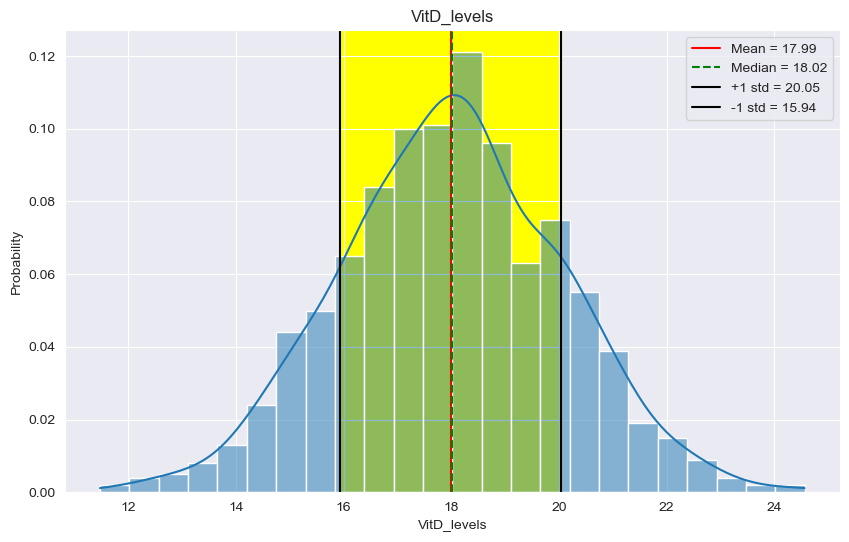

In [4]:
plot_distribution(data, 'VitD_levels')

* Is it Discrete or Continuous?
    The distribution is Continuous
* Does it have a skew? If so, which direction (+/-)
    No skew
* What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    Mesokurtic due to the kurtosis value is ~3

### Doc_visits

Kurtosis:  2.9919958083381206


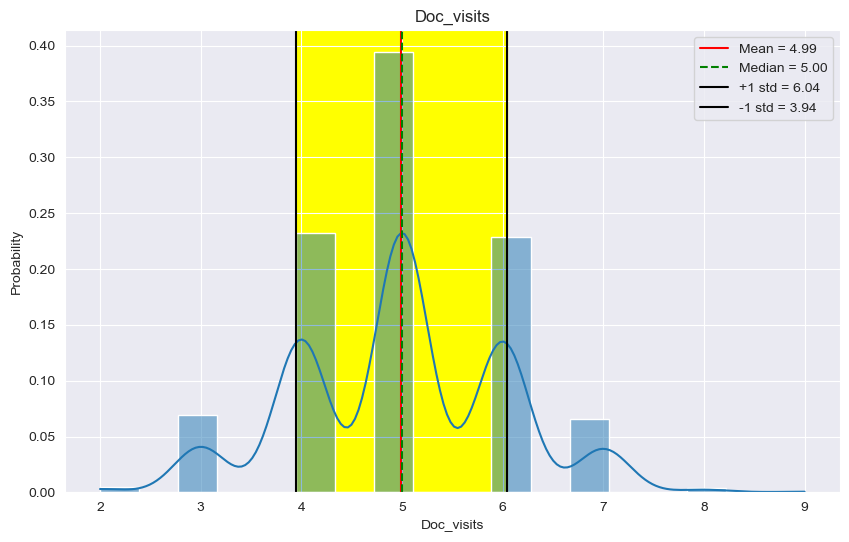

In [5]:
plot_distribution(data, 'Doc_visits')

* Is it Discrete or Continuous?
    The distribution is Discrete
* Does it have a skew? If so, which direction (+/-)
    No skew
* What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    Mesokurtic due to the kurtosis value is ~3

### TotalCharge

Kurtosis:  3.2650077463439384


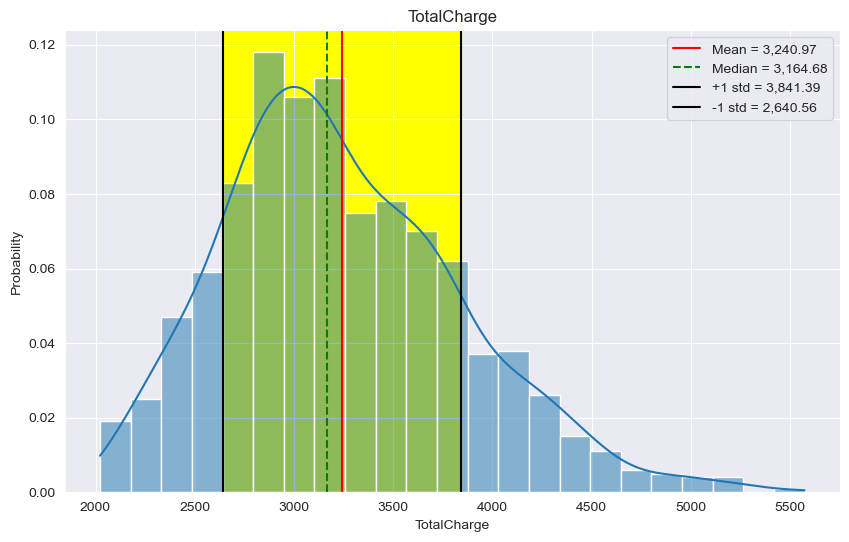

In [6]:
plot_distribution(data, 'TotalCharge')

* Is it Discrete or Continuous?
    The distribution is Continuous
* Does it have a skew? If so, which direction (+/-)
    Positive Skewed
* What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    Leptokurtic due to the kurtosis value is >3